## Script de Extração

In [1]:
import os
import time
import json
from random import random
from datetime import datetime

import requests

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

# Criando a variável data e hora

for _ in range(0, 10):

  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')

  # Captando a taxa CDI do site da B3

  try:
    response = requests.get(URL)
    response.raise_for_status()
  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
  else:
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)

  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:

    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')

  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')

  time.sleep(2 + (random() - 0.5))

print("Sucesso")

Sucesso


In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
caminho_do_arquivo = "E:\\Portifólio Github\\taxa cid atualizada\\taxa-cdi.csv"

In [15]:
df = pd.read_csv(caminho_do_arquivo)

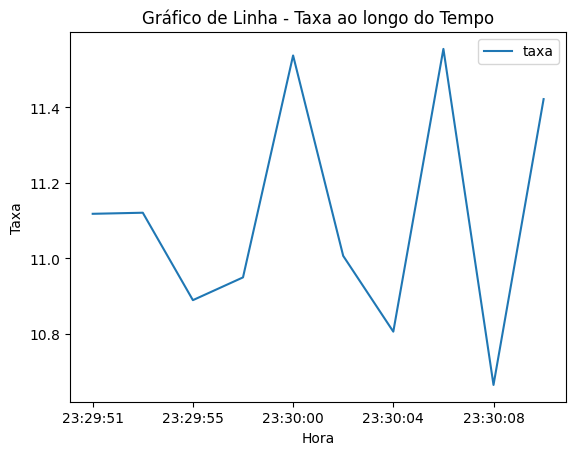

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df.plot(x='hora', y='taxa', kind='line', title='Gráfico de Linha - Taxa ao longo do Tempo')
plt.xlabel('Hora')
plt.ylabel('Taxa')

plt.savefig('grafico.png')

plt.show()

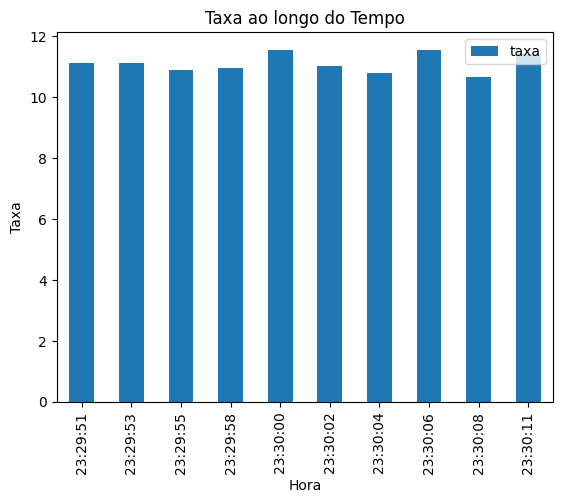

In [19]:
df.plot(x='hora', y='taxa', kind='bar', title='Taxa ao longo do Tempo')
plt.xlabel('Hora')
plt.ylabel('Taxa')
plt.savefig('grafico_barras.png')
plt.show()

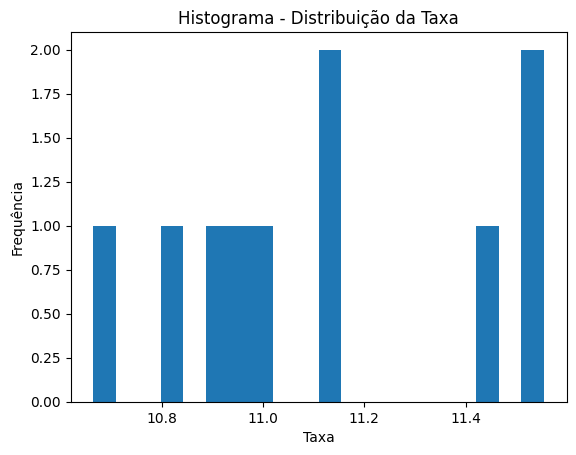

In [21]:
df['taxa'].plot(kind='hist', bins=20, title='Histograma - Distribuição da Taxa')
plt.xlabel('Taxa')
plt.ylabel('Frequência')
plt.savefig('histograma.png')
plt.show()

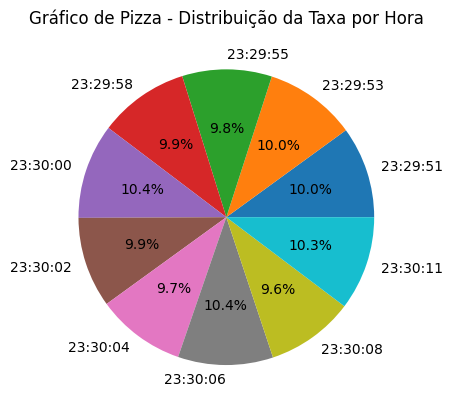

In [22]:
df_sum = df.groupby('hora').sum()
df_sum['taxa'].plot(kind='pie', autopct='%1.1f%%', title='Gráfico de Pizza - Distribuição da Taxa por Hora')
plt.ylabel('')
plt.savefig('pizza.png')
plt.show()
